In [91]:

import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation



In [92]:

class GridWorldEnv:
    def __init__(self):
        self.grid_size = 5
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 4]
        self.action_space = [0,1,2,3] # 0=up, 1=down, 2=left, 3=right 
        self.observation_space = (self.grid_size, self.grid_size)
        self.reset()
    def reset(self):
        self.agent_pos = [0, 0]
        return self.agent_pos
    def step(self, action):
        if action == 0 and self.agent_pos[0] > 0: # up
            self.agent_pos[0] -= 1
        elif action == 1 and self.agent_pos[0] < self.grid_size - 1: # down
            self.agent_pos[0] += 1
        elif action == 2 and self.agent_pos[1] > 0: # left
            self.agent_pos[1] -= 1
        elif action == 3 and self.agent_pos[1] < self.grid_size - 1: # right
            self.agent_pos[1] += 1
        
        reward = -1
        done = False
        if self.agent_pos == self.goal_pos:
            reward = 10
            done = True
        
        return self.agent_pos, reward, done, {}
    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size))
        grid[self.agent_pos[0], self.agent_pos[1]] = 1  
        grid[self.goal_pos[0], self.goal_pos[1]] = 2    
        plt.imshow(grid, cmap='viridis')
        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size))
        plt.grid(True)
        plt.show()


In [93]:

class RandomAgent:
    def __init__(self, action_space):
        self.action_space = action_space
    
    def act(self, observation):
        return random.choice(self.action_space)

In [94]:

def run_animated_episode(env, agent, max_steps=30, delay=0.5):
    env.reset()
    plt.ion()
    fig, ax = plt.subplots(figsize=(8, 8))
    
    total_reward = 0
    path = [env.agent_pos.copy()]
    
    for step in range(max_steps):
        # Action et step
        action = agent.act(env.agent_pos)
        obs, reward, done, info = env.step(action)
        total_reward += reward
        path.append(obs.copy())
        
        # Visualisation
        ax.clear()
        grid = np.zeros((env.grid_size, env.grid_size))
        
        # Marquer le chemin parcouru
        for pos in path[:-1]:
            grid[pos[0], pos[1]] = 0.3
        
        # Agent actuel et goal
        grid[obs[0], obs[1]] = 1  # Agent
        grid[env.goal_pos[0], env.goal_pos[1]] = 2  # Goal
        
        ax.imshow(grid, cmap='viridis', vmin=0, vmax=2)
        ax.set_title(f'Step: {step+1}/{max_steps} | Reward Total: {total_reward} | Action: {action}')
        ax.set_xticks(range(env.grid_size))
        ax.set_yticks(range(env.grid_size))
        ax.grid(True)
        
        plt.pause(delay)
        
        if done:
            ax.set_title(f'TERMINÉ! Steps: {step+1} | Reward Total: {total_reward}')
            plt.pause(2)
            break
    
    plt.ioff()
    plt.show()
    return path, total_reward

In [95]:

def create_step_by_step_plots(env, agent, max_steps=16):
    env.reset()
    
    # Calculer la grille de subplots
    rows = int(np.ceil(np.sqrt(max_steps)))
    cols = int(np.ceil(max_steps / rows))
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()
    
    total_reward = 0
    path = [env.agent_pos.copy()]
    
    for step in range(max_steps):
        ax = axes[step]
        
        # Action et step
        action = agent.act(env.agent_pos)
        obs, reward, done, info = env.step(action)
        total_reward += reward
        path.append(obs.copy())
        
        # Créer grille visuelle
        grid = np.zeros((env.grid_size, env.grid_size))
        
        # Marquer le chemin parcouru
        for pos in path[:-1]:
            grid[pos[0], pos[1]] = 0.3
        
        # Position actuelle et goal
        grid[obs[0], obs[1]] = 1
        grid[env.goal_pos[0], env.goal_pos[1]] = 2
        
        ax.imshow(grid, cmap='viridis', vmin=0, vmax=2)
        ax.set_title(f'Step {step+1}\nR={reward}')
        ax.set_xticks(range(env.grid_size))
        ax.set_yticks(range(env.grid_size))
        ax.grid(True)
        
        if done:
            ax.set_title(f'Step {step+1}\nGOAL! R={reward}')
            # Masquer les axes inutilisés
            for i in range(step+1, len(axes)):
                axes[i].axis('off')
            break
    
    plt.tight_layout()
    plt.show()
    return path, total_reward

In [96]:

class GridWorldAnimation:
    def __init__(self, env, agent, max_steps=50, interval=500):
        self.env = env
        self.agent = agent
        self.max_steps = max_steps
        self.interval = interval
        self.step_count = 0
        self.total_reward = 0
        self.done = False
        self.path = []

        self.env.reset()
        self.path.append(self.env.agent_pos.copy())
        
        
        self.fig, self.ax = plt.subplots(figsize=(8, 8))
        
    def animate_step(self, frame):
        if self.step_count >= self.max_steps or self.done:
            return []
        
        
        action = self.agent.act(self.env.agent_pos)
        obs, reward, done, info = self.env.step(action)
        
        self.total_reward += reward
        self.step_count += 1
        self.done = done
        self.path.append(obs.copy())
        
        # Mettre à jour visualisation
        self.ax.clear()
        grid = np.zeros((self.env.grid_size, self.env.grid_size))
        
      
        for pos in self.path[:-1]:
            grid[pos[0], pos[1]] = 0.3
            
        
        grid[obs[0], obs[1]] = 1
        grid[self.env.goal_pos[0], self.env.goal_pos[1]] = 2
        
        self.ax.imshow(grid, cmap='viridis', vmin=0, vmax=2)
        
        status = "TERMINÉ!" if done else "En cours"
        self.ax.set_title(f'{status} | Step: {self.step_count}/{self.max_steps} | Reward: {self.total_reward}')
        self.ax.set_xticks(range(self.env.grid_size))
        self.ax.set_yticks(range(self.env.grid_size))
        self.ax.grid(True)
        
        return []
    
    def create_animation(self):
        anim = FuncAnimation(self.fig, self.animate_step, 
                           frames=self.max_steps, interval=self.interval, 
                           repeat=False, blit=False)
        return anim

In [97]:

def run_multiple_episodes(env, agent, num_episodes=10, max_steps=100):
    episode_rewards = []
    episode_steps = []
    success_count = 0
    
    for episode in range(num_episodes):
        env.reset()
        total_reward = 0
        steps_taken = 0
        done = False
        
        while not done and steps_taken < max_steps:
            action = agent.act(env.agent_pos)
            obs, reward, done, info = env.step(action)
            total_reward += reward
            steps_taken += 1
        
        episode_rewards.append(total_reward)
        episode_steps.append(steps_taken)
        
        if done:
            success_count += 1
            
        if episode % 5 == 0:
            print(f"Episode {episode+1}: Reward={total_reward}, Steps={steps_taken}, Done={done}")
    

    avg_reward = np.mean(episode_rewards)
    avg_steps = np.mean(episode_steps)
    success_rate = success_count / num_episodes * 100
    
    print(f"\n=== STATISTIQUES FINALES ===")
    print(f"Épisodes réussis: {success_count}/{num_episodes} ({success_rate:.1f}%)")
    print(f"Reward moyen: {avg_reward:.2f}")
    print(f"Steps moyens: {avg_steps:.2f}")
    
  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(episode_rewards)
    ax1.set_title('Rewards par épisode')
    ax1.set_xlabel('Épisode')
    ax1.set_ylabel('Reward total')
    ax1.grid(True)
    
    ax2.plot(episode_steps)
    ax2.set_title('Steps par épisode')
    ax2.set_xlabel('Épisode')
    ax2.set_ylabel('Nombre de steps')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return episode_rewards, episode_steps

In [98]:

env = GridWorldEnv()
agent = RandomAgent(env.action_space)



print(f"Taille de la grille: {env.grid_size}x{env.grid_size}")
print(f"Position départ: {env.agent_pos}")
print(f"Position goal: {env.goal_pos}")
print(f"Actions possibles: {env.action_space}")


env.reset()
obs, reward, done, info = env.step(1)  
print(f"Après action 1 (down): pos={obs}, reward={reward}, done={done}")

Taille de la grille: 5x5
Position départ: [0, 0]
Position goal: [4, 4]
Actions possibles: [0, 1, 2, 3]
Après action 1 (down): pos=[1, 0], reward=-1, done=False


=== ANIMATION TEMPS RÉEL ===
Nombre de steps: 25
Délai entre steps: 0.1s
Démarrage de l'animation...


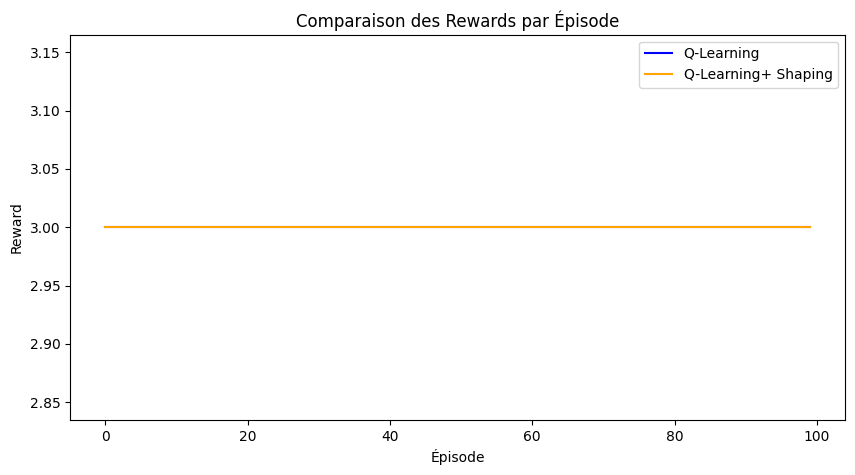

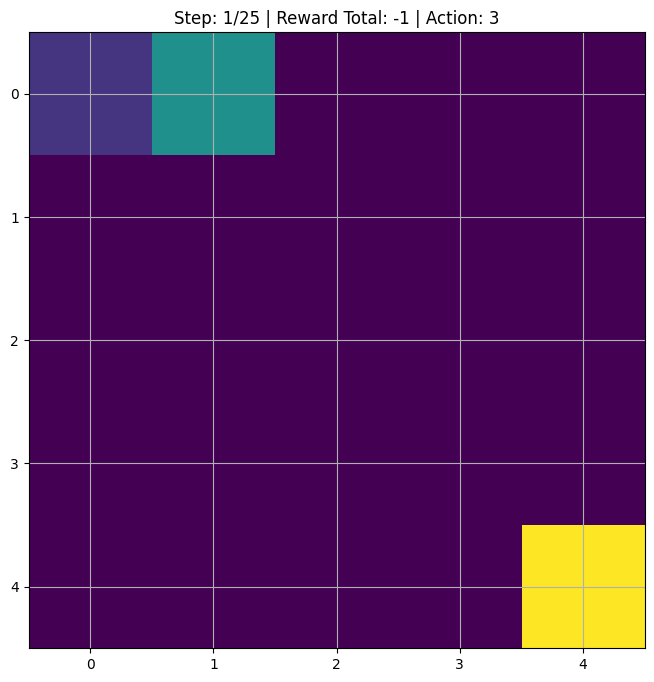


Résultats:
- Steps executés: 25
- Reward total: -25
- Goal atteint: Non


In [99]:

MAX_STEPS = 25  
DELAY = 0.1    

print(f"=== ANIMATION TEMPS RÉEL ===")
print(f"Nombre de steps: {MAX_STEPS}")
print(f"Délai entre steps: {DELAY}s")
print("Démarrage de l'animation...")


path, total_reward = run_animated_episode(env, agent, max_steps=MAX_STEPS, delay=DELAY)

print(f"\nRésultats:")
print(f"- Steps executés: {len(path)-1}")
print(f"- Reward total: {total_reward}")
print(f"- Goal atteint: {'Oui' if total_reward > 0 else 'Non'}")

Nombre de steps: 12


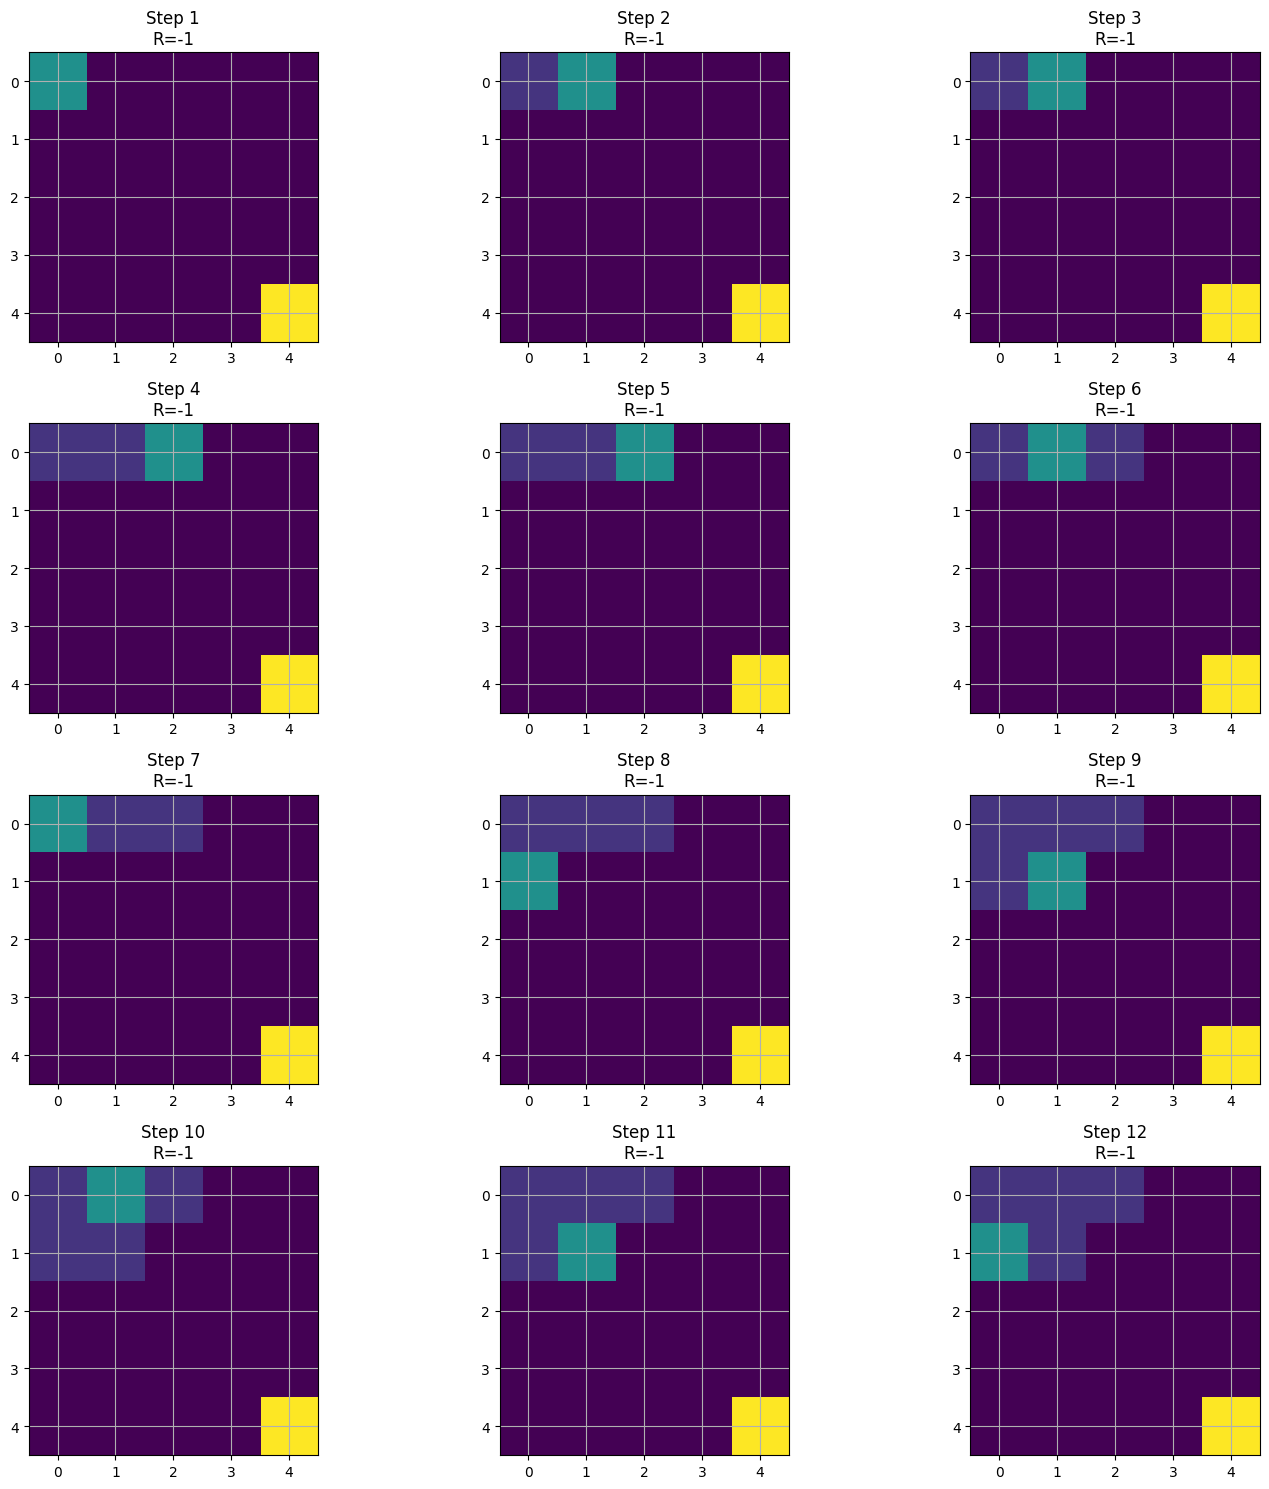


Résultats:
- Steps executés: 12
- Reward total: -12
- Chemin parcouru: 13 positions


In [100]:

GRID_STEPS = 12  


print(f"Nombre de steps: {GRID_STEPS}")


path, total_reward = create_step_by_step_plots(env, agent, max_steps=GRID_STEPS)

print(f"\nRésultats:")
print(f"- Steps executés: {len(path)-1}")
print(f"- Reward total: {total_reward}")
print(f"- Chemin parcouru: {len(path)} positions")

=== SIMULATION MULTI-ÉPISODES ===
Nombre d'épisodes: 20
Max steps par épisode: 200
Episode 1: Reward=-39, Steps=50, Done=True
Episode 6: Reward=-97, Steps=108, Done=True
Episode 11: Reward=-83, Steps=94, Done=True
Episode 16: Reward=-120, Steps=131, Done=True

=== STATISTIQUES FINALES ===
Épisodes réussis: 15/20 (75.0%)
Reward moyen: -113.30
Steps moyens: 121.55


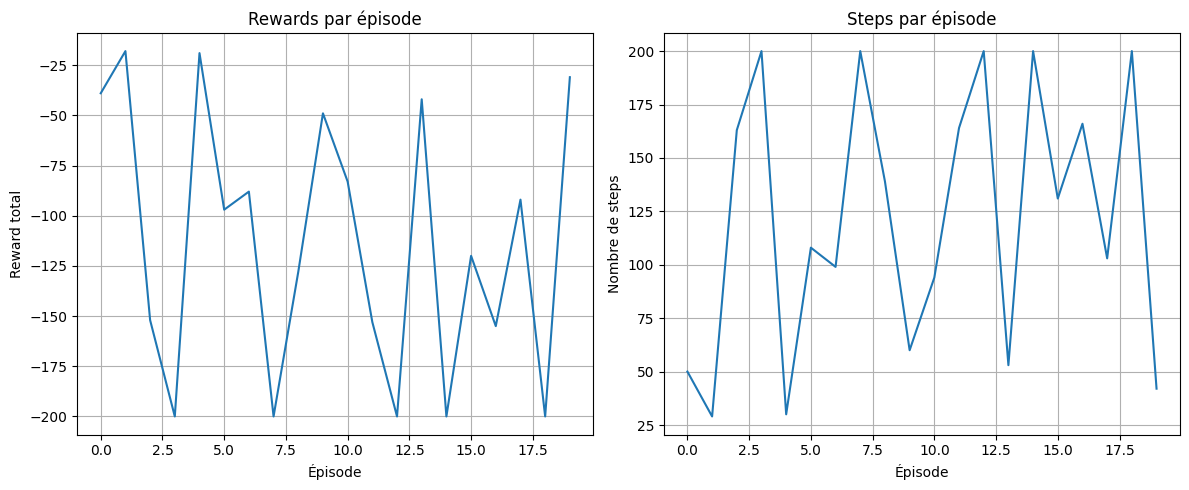

In [101]:

NUM_EPISODES = 20  
MAX_STEPS = 200   

print(f"=== SIMULATION MULTI-ÉPISODES ===")
print(f"Nombre d'épisodes: {NUM_EPISODES}")
print(f"Max steps par épisode: {MAX_STEPS}")


episode_rewards, episode_steps = run_multiple_episodes(
    env, agent, 
    num_episodes=NUM_EPISODES, 
    max_steps=MAX_STEPS
)

In [102]:

class ValueIterationAgent:

    def __init__(self,env,gamma=0.9,theta=1e-6,max_iterations=1000):
        self.env=env
        self.gamma = gamma
        self.theta =theta 
        self.max_iterations =max_iterations
        self.V = np.zeros((env.grid_size,env.grid_size))
        self.policy = np.zeros((env.grid_size,env.grid_size),dtype=int)
        self.pos_to_state = {(r,c): r*env.grid_size + c for r in range(env.grid_size) for c in range(env.grid_size)}
    def state_to_pos(self, state):  
        row = state // self.env.grid_size
        col = state % self.env.grid_size
        return [row, col]
    def get_next_state(self,state,action):
        row,col=self.state_to_pos(state)
        if action ==0 and row>0 :
            row -=1
        elif action ==1 and row<self.env.grid_size -1:
            row +=1
        elif action ==2 and col>0:
            col -=1
        elif action ==3 and col<self.env.grid_size -1:
            col +=1
        next_state = self.pos_to_state[(row,col)]
        reward = 10 if [row,col]==self.env.goal_pos else -1
        return next_state,reward
    def value_iteration(self):
        for i in range(self.max_iterations):
            delta = 0
            V_new = np.copy(self.V)
            for r in range(self.env.grid_size):
                for c in range(self.env.grid_size):
                    state = self.pos_to_state[(r,c)]
                    if [r,c]==self.env.goal_pos:
                        continue
                    Q_values = []
                    for action in self.env.action_space:
                        next_state,reward = self.get_next_state(state,action)
                        next_r,next_c = self.state_to_pos(next_state)
                        Q = reward + self.gamma * self.V[next_r,next_c]
                        Q_values.append(Q)
                    V_new[r,c] = max(Q_values)
                    delta = max(delta, abs(V_new[r,c] - self.V[r,c]))
            self.V = V_new
            if delta < self.theta:
                break
        for r in range(self.env.grid_size):
            for c in range(self.env.grid_size):
                state = self.pos_to_state[(r,c)]
                if [r,c]==self.env.goal_pos:
                    continue
                Q_values = []
                for action in self.env.action_space:
                    next_state,reward = self.get_next_state(state,action)
                    next_r,next_c = self.state_to_pos(next_state)
                    Q = reward + self.gamma * self.V[next_r,next_c]
                    Q_values.append(Q)
                self.policy[r,c] = np.argmax(Q_values)
    def act(self,observation):
        row,col = observation
        return self.policy[row,col]
    def train(self):
        self.value_iteration()            

In [103]:

class PolicyIterationAgent:
 
    def __init__(self,env,gamma=0.9,theta=1e-6,max_iterations=1000):
        self.env=env
        self.gamma = gamma
        self.theta =theta 
        self.max_iterations =max_iterations
        self.V = np.zeros((env.grid_size,env.grid_size))
        self.policy = np.random.choice(env.action_space,size=(env.grid_size,env.grid_size))
        self.pos_to_state = {(r,c): r*env.grid_size + c for r in range(env.grid_size) for c in range(env.grid_size)}
    def state_to_pos(self, state):  
        row = state // self.env.grid_size
        col = state % self.env.grid_size
        return [row, col]
    def get_next_state(self,state,action):
        row,col=self.state_to_pos(state)
        if action ==0 and row>0 :
            row -=1
        elif action ==1 and row<self.env.grid_size -1:
            row +=1
        elif action ==2 and col>0:
            col -=1
        elif action ==3 and col<self.env.grid_size -1:
            col +=1
        next_state = self.pos_to_state[(row,col)]
        reward = 10 if [row,col]==self.env.goal_pos else -1
        return next_state,reward
    def policy_evaluation(self):
        for i in range(self.max_iterations):
            delta = 0
            V_new = np.copy(self.V)
            for r in range(self.env.grid_size):
                for c in range(self.env.grid_size):
                    state = self.pos_to_state[(r,c)]
                    if [r,c]==self.env.goal_pos:
                        continue
                    action = self.policy[r,c]
                    next_state,reward = self.get_next_state(state,action)
                    next_r,next_c = self.state_to_pos(next_state)
                    V_new[r,c] = reward + self.gamma * self.V[next_r,next_c]
                    delta = max(delta, abs(V_new[r,c] - self.V[r,c]))
            self.V = V_new
            if delta < self.theta:
                break
    def policy_improvement(self):
        policy_stable = True
        for r in range(self.env.grid_size):
            for c in range(self.env.grid_size):
                state = self.pos_to_state[(r,c)]
                if [r,c]==self.env.goal_pos:
                    continue
                old_action = self.policy[r,c]
                Q_values = []
                for action in self.env.action_space:
                    next_state,reward = self.get_next_state(state,action)
                    next_r,next_c = self.state_to_pos(next_state)
                    Q = reward + self.gamma * self.V[next_r,next_c]
                    Q_values.append(Q)
                self.policy[r,c] = np.argmax(Q_values)
                if old_action != self.policy[r,c]:
                    policy_stable = False
        return policy_stable
    def policy_iteration(self):
        for i in range(self.max_iterations):
            self.policy_evaluation()
            if self.policy_improvement():
                break
    def act(self,observation):
        row,col = observation
        return self.policy[row,col]
    def train(self):
        self.policy_iteration()

In [104]:

class MonteCarloAgent:
    def __init__(self, env, gamma=0.9, epsilon=0.1):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.Q = np.zeros((env.grid_size, env.grid_size, len(env.action_space)))
        self.returns = {(r, c, a): [] for r in range(env.grid_size) for c in range(env.grid_size) for a in env.action_space}
    
    def epsilon_greedy_policy(self, state):
        if np.random.random() < self.epsilon:
            return random.choice(self.env.action_space)
        else:
            row, col = state
            return np.argmax(self.Q[row, col, :])
    
    def generate_episode(self, max_steps=1000):
        episode = []
        self.env.reset()
        state = self.env.agent_pos.copy()
        
        for step in range(max_steps):
            action = self.epsilon_greedy_policy(state)
            obs, reward, done, info = self.env.step(action)
            episode.append((state.copy(), action, reward))
            state = obs.copy()
            
            if done:
                break
        
        return episode
    
    def update_q_values(self, episode):
        G = 0
        visited_sa = set()
        
        
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]
            G = self.gamma * G + reward
            
            state_action = (state[0], state[1], action)
            
            
            if state_action not in visited_sa:
                visited_sa.add(state_action)
                self.returns[state_action].append(G)
                
                self.Q[state[0], state[1], action] = np.mean(self.returns[state_action])
    
    def train(self, num_episodes=1000):
        for episode in range(num_episodes):
            episode_data = self.generate_episode()
            self.update_q_values(episode_data)
            
            
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay
            
            if episode % 100 == 0:
                print(f"Episode {episode}, Epsilon: {self.epsilon:.3f}")
    
    def act(self, observation, training=False):
        if training:
            return self.epsilon_greedy_policy(observation)
        else:
            row, col = observation
            return np.argmax(self.Q[row, col, :])

In [105]:

class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.05):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.Q = np.zeros((env.grid_size, env.grid_size, len(env.action_space)))
    
    def epsilon_greedy_action(self, state):
        if np.random.random() < self.epsilon:
            return random.choice(self.env.action_space)
        else:
            row, col = state
            return np.argmax(self.Q[row, col, :])
    
    def update_q_value(self, state, action, reward, next_state, done):
        row, col = state
        next_row, next_col = next_state
        
        if done:
            td_target = reward
        else:
            td_target = reward + self.gamma * np.max(self.Q[next_row, next_col, :])
        
        td_error = td_target - self.Q[row, col, action]
        self.Q[row, col, action] += self.alpha * td_error
    
    def train_episode(self, max_steps=1000):
        self.env.reset()
        state = self.env.agent_pos.copy()
        total_reward = 0
        
        for step in range(max_steps):
            action = self.epsilon_greedy_action(state)
            next_state, reward, done, info = self.env.step(action)
            
            self.update_q_value(state, action, reward, next_state, done)
            
            total_reward += reward
            state = next_state.copy()
            
            if done:
                break
     
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        
        return total_reward
    
    def train(self, num_episodes=1000):
        rewards = []
        
        for episode in range(num_episodes):
            episode_reward = self.train_episode()
            rewards.append(episode_reward)
            
            if episode % 100 == 0:
                avg_reward = np.mean(rewards[-100:])
                print(f"Episode {episode}, Avg Reward: {avg_reward:.2f}, Epsilon: {self.epsilon:.3f}")
        
        return rewards
    
    def act(self, observation, training=False):
        if training:
            return self.epsilon_greedy_action(observation)
        else:
            row, col = observation
            return np.argmax(self.Q[row, col, :])

In [106]:
class QLearningShapingAgent:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.05, shaping_weight=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.shaping_weight = shaping_weight
        self.Q = np.zeros((env.grid_size, env.grid_size, len(env.action_space)))
    
    def manhattan_distance(self, pos1, pos2):
        return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])
    
    def shaped_reward(self, state, next_state, original_reward):
        current_dist = self.manhattan_distance(state, self.env.goal_pos)
        next_dist = self.manhattan_distance(next_state, self.env.goal_pos)
        
        distance_improvement = current_dist - next_dist
        shaped_reward = original_reward + self.shaping_weight * distance_improvement
        
        return shaped_reward
    
    def epsilon_greedy_action(self, state):
        if np.random.random() < self.epsilon:
            return random.choice(self.env.action_space)
        else:
            row, col = state
            return np.argmax(self.Q[row, col, :])
    
    def update_q_value(self, state, action, reward, next_state, done):
        row, col = state
        next_row, next_col = next_state
        
        shaped_reward = self.shaped_reward(state, next_state, reward)
        
        if done:
            td_target = shaped_reward
        else:
            td_target = shaped_reward + self.gamma * np.max(self.Q[next_row, next_col, :])
        
        td_error = td_target - self.Q[row, col, action]
        self.Q[row, col, action] += self.alpha * td_error
    
    def train_episode(self, max_steps=1000):
        self.env.reset()
        state = self.env.agent_pos.copy()
        total_reward = 0
        
        for step in range(max_steps):
            action = self.epsilon_greedy_action(state)
            next_state, reward, done, info = self.env.step(action)
            
            self.update_q_value(state, action, reward, next_state, done)
            
            total_reward += reward
            state = next_state.copy()
            
            if done:
                break
     
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        
        return total_reward
    
    def train(self, num_episodes=1000):
        rewards = []
        
        for episode in range(num_episodes):
            episode_reward = self.train_episode()
            rewards.append(episode_reward)
            
            if episode % 100 == 0:
                avg_reward = np.mean(rewards[-100:])
                print(f"Episode {episode}, Avg Reward: {avg_reward:.2f}, Epsilon: {self.epsilon:.3f}")
        
        return rewards
    
    def act(self, observation, training=False):
        if training:
            return self.epsilon_greedy_action(observation)
        else:
            row, col = observation
            return np.argmax(self.Q[row, col, :])

In [107]:

def pos_to_state(pos, grid_size=5):

    return pos[0] * grid_size + pos[1]

def state_to_pos(state, grid_size=5):
    
    return [state // grid_size, state % grid_size]

def get_valid_actions(pos, grid_size=5):
   
    valid_actions = []
    row, col = pos
    
    if row > 0: valid_actions.append(0)  # up
    if row < grid_size-1: valid_actions.append(1)  # down  
    if col > 0: valid_actions.append(2)  # left
    if col < grid_size-1: valid_actions.append(3)  # right
    
    return valid_actions

def simulate_action(pos, action, grid_size=5):
   
    new_pos = pos.copy()
    
    if action == 0 and pos[0] > 0: new_pos[0] -= 1  # up
    elif action == 1 and pos[0] < grid_size-1: new_pos[0] += 1  # down
    elif action == 2 and pos[1] > 0: new_pos[1] -= 1  # left  
    elif action == 3 and pos[1] < grid_size-1: new_pos[1] += 1  # right
    
    return new_pos

def get_reward(pos, goal_pos=[4,4]):
    
    if pos == goal_pos:
        return 10
    else:
        return -1



In [108]:

def train_all_agents(env, num_episodes=1000):
   
    
   
    agents = {}
    agents['Random'] = RandomAgent(env.action_space)
    agents['Value Iteration'] = ValueIterationAgent(env)
    agents['Policy Iteration'] = PolicyIterationAgent(env)
    agents['Monte Carlo'] = MonteCarloAgent(env)
    agents['Q-Learning'] = QLearningAgent(env)
    agents['Q-Learning+Shaping'] = QLearningShapingAgent(env)
    
    
    print("VI")
    agents['Value Iteration'].train()
    
    print("PI")
    agents['Policy Iteration'].train()
    
    print("MC")
    agents['Monte Carlo'].train(num_episodes)
    
    print("QL")
    agents['Q-Learning'].train(num_episodes)
    
    print("QLS")
    agents['Q-Learning+Shaping'].train(num_episodes)
    
    return agents

def visualize_policy(agent, env, title="Politique apprise"):
    fig, ax = plt.subplots(figsize=(8, 8))
    
 
    grid = np.zeros((env.grid_size, env.grid_size))
    
    
    action_symbols = ['↑', '↓', '←', '→']
    
    for r in range(env.grid_size):
        for c in range(env.grid_size):
            if [r, c] == env.goal_pos:
                ax.text(c, r, 'G', ha='center', va='center', fontsize=20, color='red', weight='bold')
            else:
                action = agent.act([r, c])
                ax.text(c, r, action_symbols[action], ha='center', va='center', fontsize=16, color='blue')
    
   
    ax.set_xlim(-0.5, env.grid_size - 0.5)
    ax.set_ylim(-0.5, env.grid_size - 0.5)
    ax.set_xticks(range(env.grid_size))
    ax.set_yticks(range(env.grid_size))
    ax.grid(True)
    ax.set_title(title, fontsize=16)
    
    
    ax.invert_yaxis()
    
    plt.tight_layout()
    plt.show()

def test_agent(agent, env, agent_name, num_episodes=50):
    success_count = 0
    total_rewards = []
    total_steps = []
    
    for episode in range(num_episodes):
        env.reset()
        total_reward = 0
        steps = 0
        done = False
        
        while not done and steps < 200:
            action = agent.act(env.agent_pos)
            obs, reward, done, info = env.step(action)
            total_reward += reward
            steps += 1
        
        if done:
            success_count += 1
        
        total_rewards.append(total_reward)
        total_steps.append(steps)
    
    success_rate = (success_count / num_episodes) * 100
    avg_reward = np.mean(total_rewards)
    avg_steps = np.mean(total_steps)
    
    print(f"\n=== RÉSULTATS {agent_name} ===")
    print(f"Taux de succès: {success_rate:.1f}%")
    print(f"Reward moyen: {avg_reward:.2f}")
    print(f"Steps moyens: {avg_steps:.2f}")
    
    return {
        'success_rate': success_rate,
        'avg_reward': avg_reward,
        'avg_steps': avg_steps,
        'rewards': total_rewards
    }

In [109]:

TRAINING_EPISODES = 500
TEST_EPISODES = 100



agents = train_all_agents(env, num_episodes=TRAINING_EPISODES)

results = {}
for agent_name, agent in agents.items():
    results[agent_name] = test_agent(agent, env, agent_name, num_episodes=TEST_EPISODES)


print(f"{'Agent':<15} {'Succès (%)':<12} {'Reward Moy':<12} {'Steps Moy':<12}")
print("-" * 60)

for agent_name, result in results.items():
    print(f"{agent_name:<15} {result['success_rate']:<12.1f} {result['avg_reward']:<12.2f} {result['avg_steps']:<12.2f}")

VI
PI
MC
Episode 0, Epsilon: 0.100
Episode 100, Epsilon: 0.060


Episode 200, Epsilon: 0.037
Episode 300, Epsilon: 0.022
Episode 400, Epsilon: 0.013
QL
Episode 0, Avg Reward: -139.00, Epsilon: 0.050
Episode 100, Avg Reward: -3.59, Epsilon: 0.030
Episode 200, Avg Reward: 2.92, Epsilon: 0.018
Episode 300, Avg Reward: 2.97, Epsilon: 0.011
Episode 400, Avg Reward: 2.91, Epsilon: 0.010
QLS
Episode 0, Avg Reward: -77.00, Epsilon: 0.050
Episode 100, Avg Reward: -2.37, Epsilon: 0.030
Episode 200, Avg Reward: 2.74, Epsilon: 0.018
Episode 300, Avg Reward: 2.95, Epsilon: 0.011
Episode 400, Avg Reward: 2.88, Epsilon: 0.010

=== RÉSULTATS Random ===
Taux de succès: 91.0%
Reward moyen: -78.52
Steps moyens: 88.53

=== RÉSULTATS Value Iteration ===
Taux de succès: 100.0%
Reward moyen: 3.00
Steps moyens: 8.00

=== RÉSULTATS Policy Iteration ===
Taux de succès: 100.0%
Reward moyen: 3.00
Steps moyens: 8.00

=== RÉSULTATS Monte Carlo ===
Taux de succès: 100.0%
Reward moyen: 3.00
Steps moyens: 8.00

=== RÉSULTATS Q-Learning ===
Taux de succès: 100.0%
Reward moyen: 3.00


comparants les agents


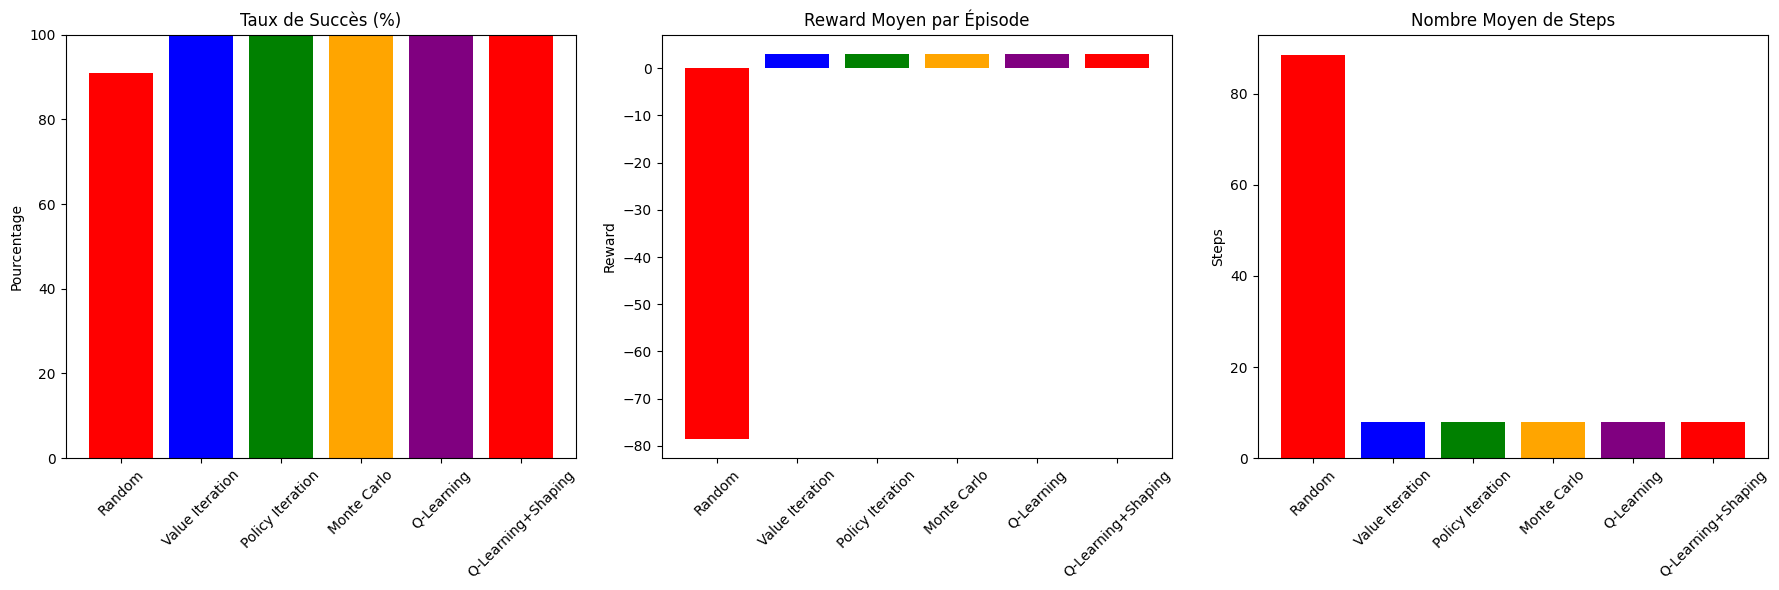

La politique apprise par chaque agent:


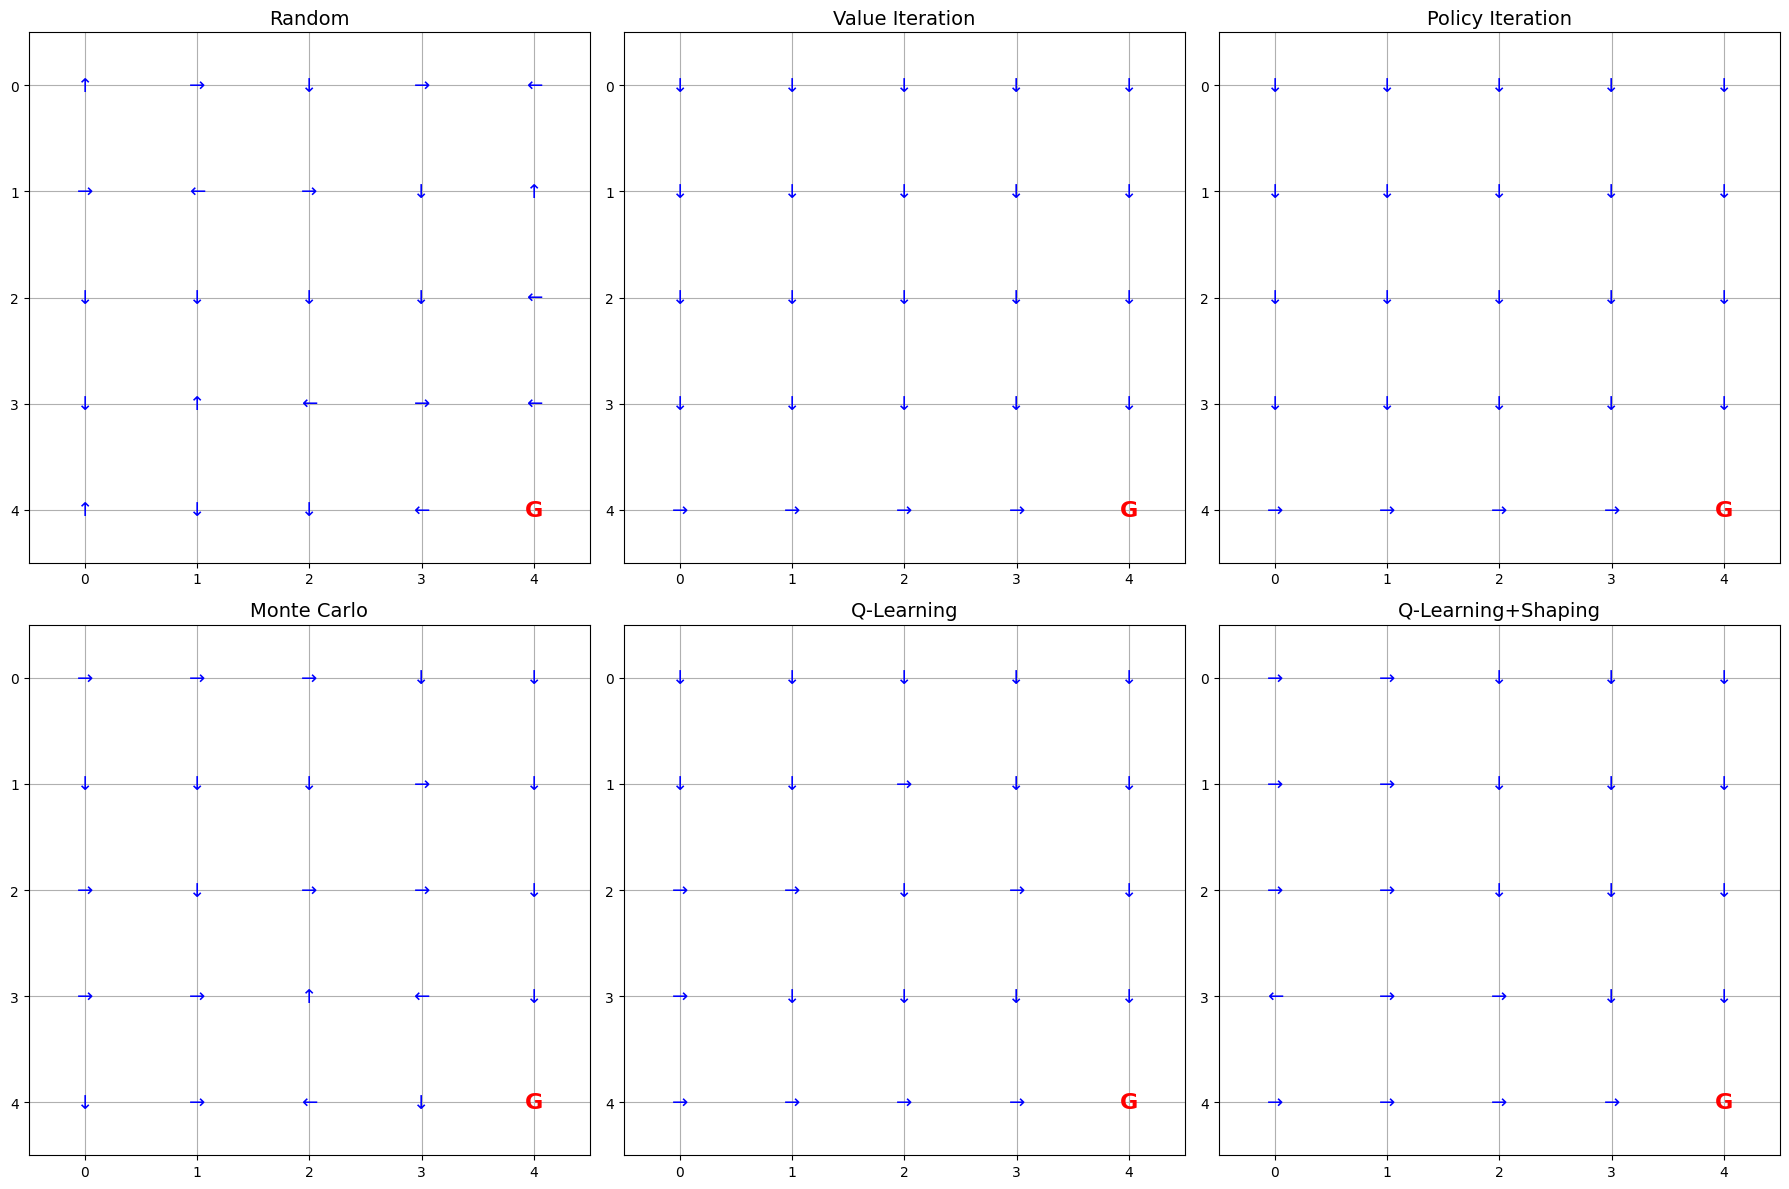

In [110]:

def compare_all_agents():

    agent_names = list(results.keys())
    success_rates = [results[name]['success_rate'] for name in agent_names]
    avg_rewards = [results[name]['avg_reward'] for name in agent_names]
    avg_steps = [results[name]['avg_steps'] for name in agent_names]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
  
    bars1 = ax1.bar(agent_names, success_rates, color=['red', 'blue', 'green', 'orange', 'purple'])
    ax1.set_title('Taux de Succès (%)')
    ax1.set_ylabel('Pourcentage')
    ax1.set_ylim(0, 100)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    
    bars2 = ax2.bar(agent_names, avg_rewards, color=['red', 'blue', 'green', 'orange', 'purple'])
    ax2.set_title('Reward Moyen par Épisode')
    ax2.set_ylabel('Reward')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    
  
    bars3 = ax3.bar(agent_names, avg_steps, color=['red', 'blue', 'green', 'orange', 'purple'])
    ax3.set_title('Nombre Moyen de Steps')
    ax3.set_ylabel('Steps')
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

def visualize_all_policies():

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    agent_names = list(agents.keys())
    action_symbols = ['↑', '↓', '←', '→']
    
    for idx, (agent_name, agent) in enumerate(agents.items()):
        if idx >= 6:  
            break
            
        ax = axes[idx]
        
        for r in range(env.grid_size):
            for c in range(env.grid_size):
                if [r, c] == env.goal_pos:
                    ax.text(c, r, 'G', ha='center', va='center', fontsize=16, color='red', weight='bold')
                else:
                    action = agent.act([r, c])
                    ax.text(c, r, action_symbols[action], ha='center', va='center', fontsize=14, color='blue')
        
        ax.set_xlim(-0.5, env.grid_size - 0.5)
        ax.set_ylim(-0.5, env.grid_size - 0.5)
        ax.set_xticks(range(env.grid_size))
        ax.set_yticks(range(env.grid_size))
        ax.grid(True)
        ax.set_title(f'{agent_name}', fontsize=14)
        ax.invert_yaxis()
    
    
    for idx in range(len(agents), 6):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


print("comparants les agents")
compare_all_agents()

print("La politique apprise par chaque agent:")
visualize_all_policies()



 TEST DÉTAILLÉ DE L'AGENT Q-Learning 


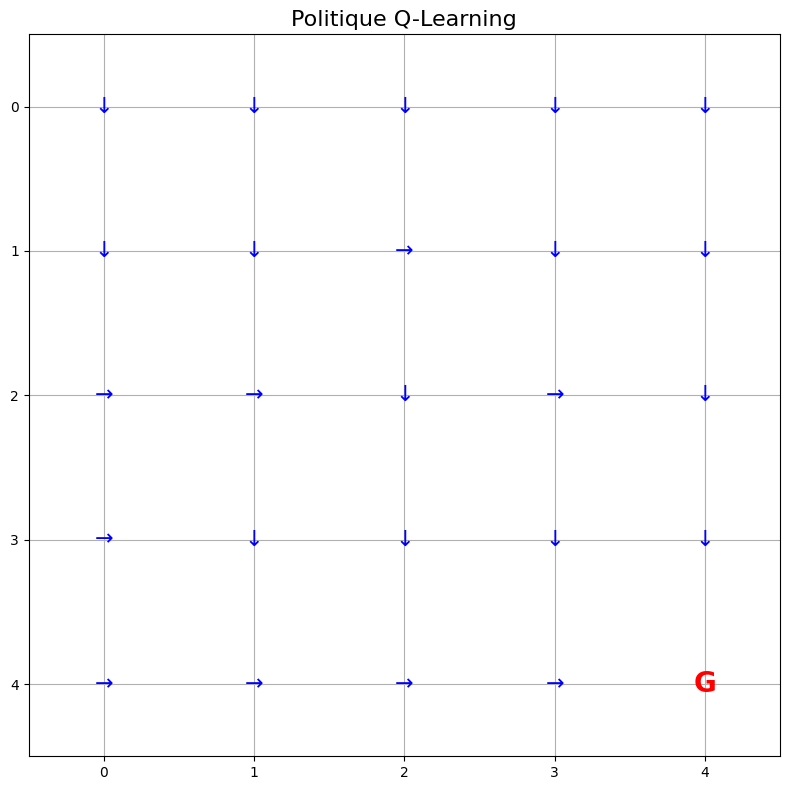


Animation de l'agent Q-Learning:


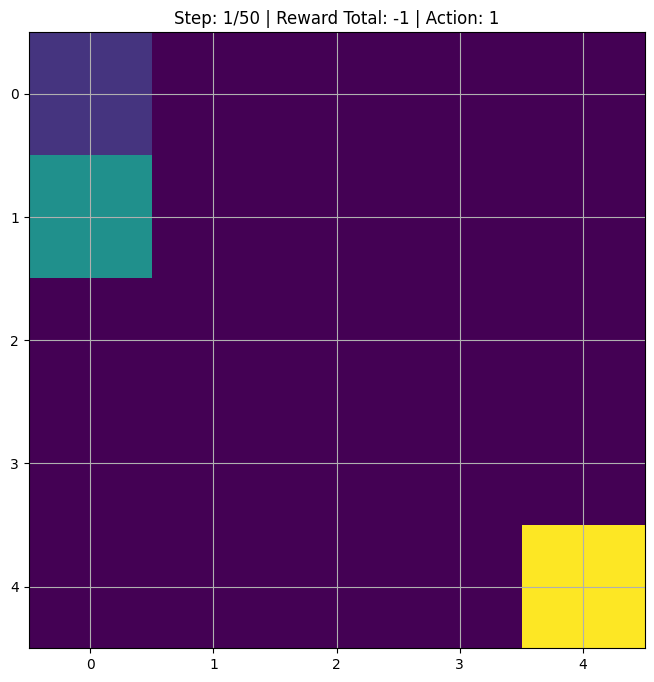


Performances détaillées:
- Reward total: 3
- Nombre de steps: 8
- Goal atteint: Oui
- Chemin optimal: True


In [111]:

AGENT_TO_TEST = 'Q-Learning' 

print(f" TEST DÉTAILLÉ DE L'AGENT {AGENT_TO_TEST} ")


visualize_policy(agents[AGENT_TO_TEST], env, f"Politique {AGENT_TO_TEST}")

print(f"\nAnimation de l'agent {AGENT_TO_TEST}:")
path, total_reward = run_animated_episode(env, agents[AGENT_TO_TEST], max_steps=50, delay=0.3)

print(f"\nPerformances détaillées:")
print(f"- Reward total: {total_reward}")
print(f"- Nombre de steps: {len(path)-1}")
print(f"- Goal atteint: {'Oui' if env.agent_pos == env.goal_pos else 'Non'}")
print(f"- Chemin optimal: {len(path)-1 <= 8}")  

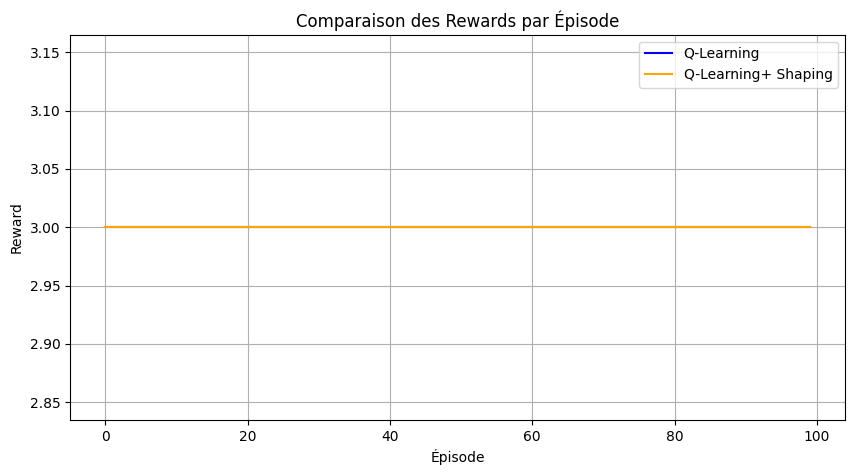

In [112]:
# un plot simple pour visualiser les deux ql et ql-shaping
plt.figure(figsize=(10,5))
plt.plot(results['Q-Learning']['rewards'], label='Q-Learning', color='blue')
plt.plot(results['Q-Learning+Shaping']['rewards'], label='Q-Learning+ Shaping', color='orange')
plt.xlabel('Épisode')
plt.ylabel('Reward')
plt.title('Comparaison des Rewards par Épisode')
plt.legend()
plt.grid(True)
plt.show()